<a href="https://colab.research.google.com/github/taqihaider7/C4AI-BIRDS-CUDA-Programming/blob/master/BIRDS_MINI_COHORT_2_Introduction_to_Concurrent_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Threading

In [ ]:
import threading
import time

def thread_task(name, delay):
    print(f"Thread {name} starting.")
    time.sleep(delay)
    print(f"Thread {name} finished after {delay} seconds.")

# Create threads
thread1 = threading.Thread(target=thread_task, args=("A", 2))
thread2 = threading.Thread(target=thread_task, args=("B", 3))

# Start threads
thread1.start()
thread2.start()

# Wait for threads to complete
thread1.join()
thread2.join()

print("Both threads have completed their execution.")

Thread A starting.
Thread B starting.
Thread A finished after 2 seconds.
Thread B finished after 3 seconds.
Both threads have completed their execution.


In [ ]:
def thread_task(name, count):
    for i in range(count):
        print(f"Thread {name}: {i}")

# Adjust count to a high number to observe the interleaving outputs
thread1 = threading.Thread(target=thread_task, args=("A", 10))
thread2 = threading.Thread(target=thread_task, args=("B", 10))

thread1.start()
thread2.start()

thread1.join()
thread2.join()

Thread A: 0
Thread A: 1
Thread A: 2
Thread A: 3
Thread A: 4
Thread A: 5
Thread A: 6
Thread A: 7
Thread A: 8
Thread A: 9
Thread B: 0
Thread B: 1
Thread B: 2
Thread B: 3
Thread B: 4
Thread B: 5
Thread B: 6
Thread B: 7
Thread B: 8
Thread B: 9


In [ ]:
import threading
import time

def thread_task(name, count):
    for i in range(count):
        print(f"Thread {name}: {i}")
        time.sleep(0.01)  # Short sleep to yield control

# Threads
thread1 = threading.Thread(target=thread_task, args=("A", 10))
thread2 = threading.Thread(target=thread_task, args=("B", 10))

thread1.start()
thread2.start()

thread1.join()
thread2.join()

Thread A: 0
Thread B: 0
Thread A: 1
Thread B: 1
Thread A: 2
Thread B: 2
Thread A: 3
Thread B: 3
Thread A: 4
Thread B: 4
Thread A: 5
Thread B: 5
Thread A: 6
Thread B: 6
Thread A: 7
Thread B: 7
Thread A: 8
Thread B: 8
Thread A: 9
Thread B: 9


# Multi-processing

In [ ]:
import multiprocessing

def process_task(number):
    result = number * number
    print(f"The square of {number} is {result}.")

# Create processes
process1 = multiprocessing.Process(target=process_task, args=(5,))
process2 = multiprocessing.Process(target=process_task, args=(10,))

# Start processes
process1.start()
process2.start()

# Wait for processes to complete
process1.join()
process2.join()

print("Both processes have completed their computation.")


The square of 5 is 25.
The square of 10 is 100.
Both processes have completed their computation.


In [ ]:
# importing the multiprocessing module
import multiprocessing
import os

def worker1():
    # printing process id
    print("ID of process running worker1: {}".format(os.getpid()))

def worker2():
    # printing process id
    print("ID of process running worker2: {}".format(os.getpid()))

if __name__ == "__main__":
    # printing main program process id
    print("ID of main process: {}".format(os.getpid()))

    # creating processes
    p1 = multiprocessing.Process(target=worker1)
    p2 = multiprocessing.Process(target=worker2)

    # starting processes
    p1.start()
    p2.start()

    # process IDs
    print("ID of process p1: {}".format(p1.pid))
    print("ID of process p2: {}".format(p2.pid))

    # wait until processes are finished
    p1.join()
    p2.join()

    # both processes finished
    print("Both processes finished execution!")

    # check if processes are alive
    print("Process p1 is alive: {}".format(p1.is_alive()))
    print("Process p2 is alive: {}".format(p2.is_alive()))

ID of main process: 210
ID of process running worker1: 1143
ID of process running worker2: 1146
ID of process p1: 1143
ID of process p2: 1146
Both processes finished execution!
Process p1 is alive: False
Process p2 is alive: False


# Thread Lock

In [ ]:
import threading

# Shared resource
counter = 0
lock = threading.Lock()

def increment():
    global counter
    lock.acquire()
    try:
        for _ in range(100000):
            counter += 1
    finally:
        lock.release()

# Threads
thread1 = threading.Thread(target=increment)
thread2 = threading.Thread(target=increment)

# Start threads
thread1.start()
thread2.start()

# Wait for threads to complete
thread1.join()
thread2.join()

print(f"Final counter value: {counter}")


Final counter value: 200000


# Multiprocessing Queues

When you're working with multithreading your threads can share the resources and data being on the same process. However, sharing data between different processes poses a more tricky due to the isolation between separate process memory spaces. This is where process queues come into play for interprocess communication. Process queues provide a process safe mechanism for sending and fetching data between processes, ensuring that data integrity is maintained even when multiple processes interact.

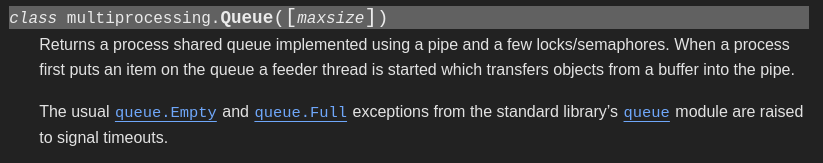


A `Queue` only takes maxsize as argument that defines the max element limit in a queue:

* You can use `empty` and `full` methods to see if the queue is empty or full respectively.
* If you try to put element in an empty queue it'll be blocked.
* You can override block using `put(element, block=False)` or `put_nowait(element)` but it'll raise an error.

## A Dive into `Queue`

In [ ]:
from multiprocessing import Queue

queue = Queue(maxsize=2)

print(queue.empty())
print(queue.full())

queue.put(1)
queue.put(2)

print(queue.empty())
print(queue.full())

True
False
True
True


In [ ]:
from time import sleep

queue = Queue(maxsize=2)

print(queue.empty())
print(queue.full())

queue.put(1)
queue.put(2)
sleep(2)

print(queue.empty())
print(queue.full())

True
False
False
True


> Sometimes print outputs can behave unpredictably due to the way execution cells or lines are processed.

Asynchronous Display, Output buffering and what not!!

In [ ]:
queue.qsize()

2

In [ ]:
print(queue.get())
print(queue.get())

1
2


In [ ]:
queue.qsize()

0

## A Working Example

In [ ]:
import random

is_even = lambda x: (x % 2 == 0)

is_even(2)

True

In [ ]:
def producer(queue, n_numbers):
    for _ in range(n_numbers):
        num = random.randint(1, 100000)

        queue.put(num)

        print(f"Produced {num}")

    print("Producer finished producing")

def consumer(queue):
    while True:
        num = queue.get()

        if num is None:
            break

        result = is_even(num)

        print(f"Consumed {num}: Even={result}")

    print("Consumer finished consuming")

In [ ]:
from multiprocessing import Process

def main():
    n_producers = 2
    n_consumers = 4
    n_numbers = 10

    queue = Queue(maxsize=10)

    producers = [Process(target=producer, args=(queue, n_numbers)) for _ in range(n_producers)]
    consumers = [Process(target=consumer, args=(queue,)) for _ in range(n_consumers)]

    for p in producers:
        p.start()

    for c in consumers:
        c.start()

    for p in producers:
        p.join()

    for _ in range(n_consumers):
        queue.put(None)

    # Ensure all consumers finish
    for c in consumers:
        c.join()

In [ ]:
main()

Produced 49702
Produced 87549Produced 98852Consumed 49702: Even=True

Produced 81177
Produced 65206
Consumed 81177: Even=False
Produced 84278
Produced 17774
Consumed 87549: Even=FalseConsumed 98852: Even=True
Produced 85121
Consumed 65206: Even=True
Produced 96319Consumed 84278: Even=True
Produced 99808


Consumed 85121: Even=FalseConsumed 96319: Even=False
Consumed 99808: Even=TrueProduced 30144


Consumed 17774: Even=TrueProduced 15360
Consumed 30144: Even=TrueConsumed 15360: Even=True
Produced 51407
Consumed 51407: Even=FalseConsumed 89979: Even=False



Produced 89979

Consumed 30913: Even=FalseProduced 30913Produced 75550Consumed 75550: Even=True



Produced 56693Produced 21591Consumed 21591: Even=FalseConsumed 56693: Even=False


Producer finished producing
Consumed 94033: Even=False
Produced 94033

Produced 27908Consumed 27908: Even=True

Producer finished producing
Consumer finished consumingConsumer finished consumingConsumer finished consumingConsumer finished consuming





## UDAPDR: A Real CodeBase Walkthrough for Process Queues

# Mutex

Mutex (mutual exclusion) is a synchronization primitive that is used to prevent multiple threads from accessing a shared resource or a critical section of code simultaneously. This is essential in multi-threaded applications to avoid data corruption or inconsistent states caused by concurrent modifications.

In python, mutex is the same as a lock and it's not used that widely in Python. However in languages like C and Rust word mutex is often discussed more than locks. See here: https://doc.rust-lang.org/std/sync/struct.Mutex.html

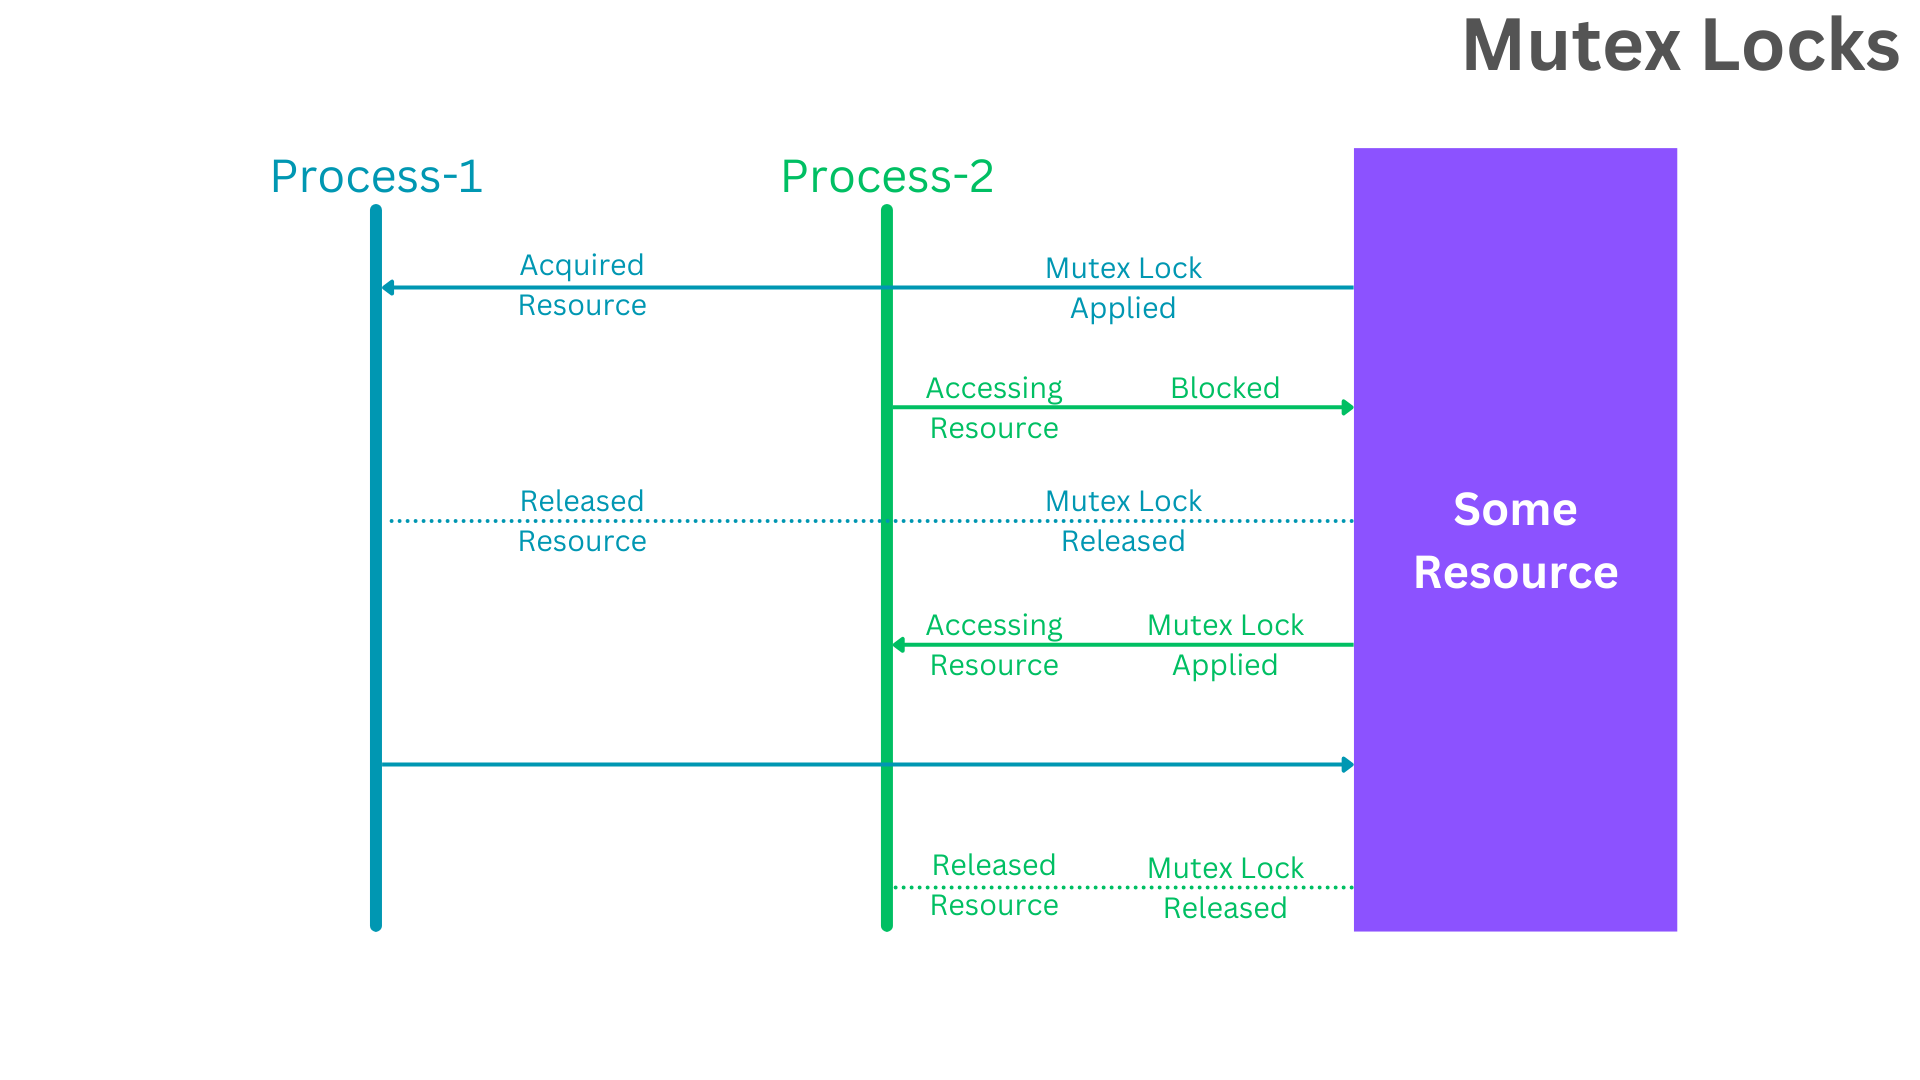

So why are we talking about Mutex seperately? Well mostly it's to get a chance to give you these paper:

* [Solution of a Problem in Concurrent Programming Control ](https://rust-class.org/static/classes/class19/dijkstra.pdf)
* [Mutual Exclusion](https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=30e83735eb72af97e7ab3ec7f0823b9a9ae5493c)

> *Mutex is one of the most important concept in distributed systems.*
>
> **- Somebody that I used to Know**

In Python and other languages, a lock is a specific implementation of mutex. While locks are the most direct and common way to implement mutex, there are indeed other algorithms that can achieve the same goal of preventing multiple threads from accessing the same resource simultaneously.

# Semaphores

Semaphore are another type of Syncronization or Concurrency Primitive that puts a limits on the number of processes (or threads) that can acquire a lock on a shared resource.

> *Internally, the semaphore maintains a counter protected by a mutex lock that is incremented each time the semaphore is acquired and decremented each time it is released.*
>
> \- [**Multiprocessing Semaphore in Python**](https://superfastpython.com/multiprocessing-semaphore-in-python/)



In [ ]:
from random import random
from time import sleep

def task(semaphore, number):
    # attempt to acquire the semaphore
    with semaphore:
        # simulate computational effort
        value = random()
        sleep(value)
        # report result
        print(f'Process {number} got {value}')

In [ ]:
from multiprocessing import Semaphore, Process

semaphore = Semaphore(2)
processes = [Process(target=task, args=(semaphore, i)) for i in range(10)]

In [ ]:
for process in processes:
    process.start()

for process in processes:
    process.join()

Process 1 got 0.1359942954225124
Process 2 got 0.259867575741484
Process 0 got 0.31268798101299844
Process 4 got 0.43394404631769956
Process 9 got 0.49274826040389197
Process 7 got 0.5726256522183379
Process 3 got 0.6820483408667738
Process 6 got 0.7772782639261856
Process 8 got 0.7848606129832172
Process 5 got 0.8952349097271748


In [ ]:
from random import random
from time import sleep

def task(semaphore, number):
    # attempt to acquire the semaphore
    semaphore.acquire()

    # simulate computational effort
    value = random()
    sleep(value)
    # report result
    print(f'Process {number} got {value}')

    semaphore.release()

In [ ]:
semaphore = Semaphore(3)
processes = [Process(target=task, args=(semaphore, i)) for i in range(10)]

In [ ]:
for process in processes:
    process.start()

for process in processes:
    process.join()

Process 1 got 0.33098651633254783
Process 3 got 0.26226603001087545
Process 2 got 0.8650997008880776
Process 0 got 0.9212460944912066
Process 5 got 0.6837889044508308
Process 4 got 0.9560397081179939
Process 6 got 0.8350112676886378
Process 9 got 0.0512471737960033
Process 7 got 0.9622468896758954
Process 8 got 0.9788813253886308


Talking points:
* The Mutex Game (Stop the recording!!)
* Is multithreading always so good?